In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Merge data by geoid (all years)

In [53]:
# load dataset into Pandas DataFrame
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"D:\dataGasLeaks\combined_data_311_gentr.csv")
df_acs_new = pd.read_csv(r"D:\dataGasLeaks\combined_data_all_part.csv")

In [54]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df_acs_new.drop('Unnamed: 0', axis = 1, inplace = True)

In [55]:
columns = ['geoid', 'incident_year','gas_leaks', 'gas_leaks_per_person','population','gentrified', '%housh_grandp_resp_for_grandch', 'avg_houshold_size', 'avg_bldg_age',
       'lonely_housholder%', 'lonely_housholder_over65%',
       'mean_houshold_income', 'nonfamily_housholds%',
       'not_us_citizen%', 'total_housing_units', 'unemployed%',
       'vacant_housing_units%', '311constr_compl_per_person',
       '311total_compl_pp', 
       '311: blocked driveway', '311: dirty conditions', '311: heat/hot water',
       '311: heating', '311: illegal parking', '311: noise',
       '311: paint/plaster', '311: plumbing',
       '311: request large bulky item collection', '311: sanitation condition',
       '311: sewer', '311: street condition', '311: street light condition',
       '311: unsanitary condition', '311: water system']
df = df[columns]
df.head()

,geoid,incident_year,gas_leaks,gas_leaks_per_person,population,gentrified,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_bldg_age,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,nonfamily_housholds%,not_us_citizen%,total_housing_units,unemployed%,vacant_housing_units%,311constr_compl_per_person,311total_compl_pp,311: blocked driveway,311: dirty conditions,311: heat/hot water,311: heating,311: illegal parking,311: noise,311: paint/plaster,311: plumbing,311: request large bulky item collection,311: sanitation condition,311: sewer,311: street condition,311: street light condition,311: unsanitary condition,311: water system
0,36005000200,2013,2,0.000412,4858.000641,0.0,9.576837,3.60,61.371429,18.040089,11.210097,72652.0,19.005197,11.198024,1476,8.5,8.7,0.154384,0.154385,66,28,0,42,24,126,0,17,0,16,36,24,84,0,25
1,36005000400,2013,5,0.000936,5343.998529,0.0,4.164290,3.04,53.669267,13.519681,7.187678,80733.0,18.881917,7.821856,1912,5.7,8.3,0.157373,0.157373,29,8,0,68,33,76,0,57,0,10,29,20,107,0,35
2,36005001600,2013,11,0.002109,5215.000237,0.0,1.748072,2.55,53.719298,33.470437,13.984576,44609.0,34.035990,15.819751,2043,6.6,4.8,0.119847,0.119847,33,8,0,90,14,91,0,23,0,15,7,24,82,0,23
3,36005001900,2013,3,0.001171,2562.000410,1.0,0.000000,2.60,81.918310,35.499398,2.406739,42285.0,44.645006,24.863388,891,18.5,6.7,0.444574,0.444574,26,10,0,143,48,109,0,63,0,28,33,142,29,0,76
4,36005002000,2013,42,0.004967,8456.000710,0.0,6.241611,2.84,73.765727,28.624161,12.953020,34044.0,29.798658,9.425260,3161,13.5,5.7,0.108562,0.108562,66,18,0,81,17,311,0,44,0,9,6,12,47,0,22


In [56]:
done_columns = df_acs_new.columns
todo_columns = list(set(df.columns) - set(done_columns))

In [57]:
todo_columns = [
    'geoid',
 'population',
     'incident_year',
     'avg_bldg_age',
    'gentrified',
    '311constr_compl_per_person',
 '311total_compl_pp',
    '311: water system',
 '311: noise',
 '311: plumbing',
 '311: illegal parking',
 '311: unsanitary condition',
 '311: sewer',
 
 '311: street light condition',
 

 '311: heating',
 '311: street condition',

 '311: blocked driveway',
 '311: sanitation condition',
 '311: paint/plaster',
 '311: dirty conditions',
 '311: request large bulky item collection',
 '311: heat/hot water']

In [58]:
df_todo = df[todo_columns]

In [59]:
df_todo.head()

,geoid,population,incident_year,avg_bldg_age,gentrified,311constr_compl_per_person,311total_compl_pp,311: water system,311: noise,311: plumbing,311: illegal parking,311: unsanitary condition,311: sewer,311: street light condition,311: heating,311: street condition,311: blocked driveway,311: sanitation condition,311: paint/plaster,311: dirty conditions,311: request large bulky item collection,311: heat/hot water
0,36005000200,4858.000641,2013,61.371429,0.0,0.154384,0.154385,25,126,17,24,0,36,84,42,24,66,16,0,28,0,0
1,36005000400,5343.998529,2013,53.669267,0.0,0.157373,0.157373,35,76,57,33,0,29,107,68,20,29,10,0,8,0,0
2,36005001600,5215.000237,2013,53.719298,0.0,0.119847,0.119847,23,91,23,14,0,7,82,90,24,33,15,0,8,0,0
3,36005001900,2562.000410,2013,81.918310,1.0,0.444574,0.444574,76,109,63,48,0,33,29,143,142,26,28,0,10,0,0
4,36005002000,8456.000710,2013,73.765727,0.0,0.108562,0.108562,22,311,44,17,0,6,47,81,12,66,9,0,18,0,0


In [60]:
df_todo['311building_related_complaints'] = df_todo['311constr_compl_per_person']*df_todo['population']
df_todo['311total_compl'] = df_todo['311total_compl_pp']*df_todo['population']
df_todo.drop(['311constr_compl_per_person', '311total_compl_pp'],axis = 1, inplace = True)

C:\Users\mskac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mskac\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mskac\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [61]:
df_todo = df_todo.groupby('geoid').agg({'population': 'sum', 'avg_bldg_age': 'mean', 'gentrified': 'first',
       '311: water system': 'sum', '311: noise': 'sum', '311: plumbing': 'sum',
       '311: illegal parking': 'sum', '311: unsanitary condition': 'sum', '311: sewer': 'sum',
       '311: street light condition': 'sum', '311: heating': 'sum', '311: street condition': 'sum',
       '311: blocked driveway': 'sum', '311: sanitation condition': 'sum',
       '311: paint/plaster': 'sum', '311: dirty conditions': 'sum',
       '311: request large bulky item collection': 'sum', '311: heat/hot water': 'sum',
       '311total_compl': 'sum'}).reset_index()

In [ ]:
'311total_compl_pp',
    '311: water system',
 '311: noise',
 '311: plumbing',
 '311: illegal parking',
 '311: unsanitary condition',
 '311: sewer',
 
 '311: street light condition',
 

 '311: heating',
 '311: street condition',

 '311: blocked driveway',
 '311: sanitation condition',
 '311: paint/plaster',
 '311: dirty conditions',
 '311: request large bulky item collection',
 '311: heat/hot water'

In [62]:
df_todo['311total_compl_pp'] = df_todo['311total_compl'] / df_todo['population']
df_todo['%311: water system'] = df_todo['311: water system'] / df_todo['311total_compl']
df_todo['%311: noise'] = df_todo['311: noise'] / df_todo['311total_compl']
df_todo['%311: plumbing'] = df_todo['311: plumbing'] / df_todo['311total_compl']
df_todo['%311: illegal parking'] = df_todo['311: illegal parking'] / df_todo['311total_compl']
df_todo['%311: unsanitary condition'] = df_todo['311: unsanitary condition'] / df_todo['311total_compl']
df_todo['%311: sewer'] = df_todo['311: sewer'] / df_todo['311total_compl']
df_todo['%311: street light condition'] = df_todo['311: street light condition'] / df_todo['311total_compl']
df_todo['%311: heating'] = df_todo['311: heating'] / df_todo['311total_compl']
df_todo['%311: street condition'] = df_todo['311: street condition'] / df_todo['311total_compl']
df_todo['%311: blocked driveway'] = df_todo['311: blocked driveway'] / df_todo['311total_compl']
df_todo['%311: sanitation condition'] = df_todo['311: sanitation condition'] / df_todo['311total_compl']
df_todo['%311: paint/plaster'] = df_todo['311: paint/plaster'] / df_todo['311total_compl']
df_todo['%311: dirty conditions'] = df_todo['311: dirty conditions'] / df_todo['311total_compl']
df_todo['%311: request large bulky item collection'] = df_todo['311: request large bulky item collection'] / df_todo['311total_compl']
df_todo['%311: heat/hot water'] = df_todo['311: heat/hot water'] / df_todo['311total_compl']

df_todo.drop(['311total_compl','311: water system',
 '311: noise',
 '311: plumbing',
 '311: illegal parking',
 '311: unsanitary condition',
 '311: sewer',
 
 '311: street light condition',
 

 '311: heating',
 '311: street condition',

 '311: blocked driveway',
 '311: sanitation condition',
 '311: paint/plaster',
 '311: dirty conditions',
 '311: request large bulky item collection',
 '311: heat/hot water'], axis = 1, inplace = True)


In [63]:
merged_dfs = df_todo.merge(df_acs_new, how='inner', on = ['geoid'], validate="one_to_one")
merged_dfs = merged_dfs.sort_values(by = ['geoid'])
merged_dfs

,geoid,population,avg_bldg_age,gentrified,311total_compl_pp,%311: water system,%311: noise,%311: plumbing,%311: illegal parking,%311: unsanitary condition,%311: sewer,%311: street light condition,%311: heating,%311: street condition,%311: blocked driveway,%311: sanitation condition,%311: paint/plaster,%311: dirty conditions,%311: request large bulky item collection,%311: heat/hot water,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_year_built,gas_leaks,gas_leaks_per_person,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,median_age,nonfamily_housholds%,not_us_citizen%,total_housing_units,total_population,unemployed%,vacant_housing_units%
0,36005000200,30207.007284,63.858473,0.0,0.261595,0.041762,0.176158,0.021893,0.080613,0.025690,0.017970,0.053531,0.008732,0.030499,0.079980,0.025943,0.011390,0.023665,0.015439,0.034675,5.553494,3.730000,1958.589827,38,0.001258,17.439703,8.188002,75457.166667,38.300000,20.519481,13.337968,8880,30207,4.217565,8.952703
1,36005000400,34388.997939,52.790890,0.0,0.191689,0.046420,0.120601,0.027761,0.079490,0.020934,0.027002,0.085558,0.015777,0.041717,0.088592,0.019569,0.015018,0.015777,0.016839,0.039138,1.970487,3.031667,1977.564408,49,0.001425,16.311743,5.876116,85459.333333,38.016667,21.525139,7.444241,12399,34389,3.986740,8.726510
2,36005001600,34594.000441,56.219298,0.0,0.145979,0.023168,0.120990,0.029109,0.033069,0.034059,0.012079,0.094851,0.028119,0.041980,0.087129,0.020792,0.015248,0.013663,0.010099,0.109703,0.826587,2.815000,1971.800058,99,0.002862,27.158074,13.583298,47136.666667,37.466667,27.942054,16.517315,12290,34594,3.173961,4.515867
3,36005001900,15985.998903,83.265758,1.0,0.644376,0.058247,0.088535,0.029609,0.069896,0.026599,0.031939,0.019513,0.020192,0.117950,0.029512,0.027958,0.020483,0.016115,0.006213,0.074750,2.451161,2.425000,1965.909253,38,0.002377,37.670475,1.787689,47365.333333,31.333333,47.806856,15.832604,5763,15986,8.438634,5.847649
4,36005002000,54079.003151,75.918286,0.0,0.141996,0.029822,0.242349,0.034510,0.027087,0.033338,0.012502,0.045709,0.016539,0.034640,0.095455,0.013023,0.024482,0.015627,0.010809,0.082172,4.998347,2.981667,1949.778482,314,0.005806,29.499614,13.126860,34932.000000,33.416667,30.342775,9.354833,19106,54079,5.571479,5.024600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,36085030301,29904.004656,46.794827,0.0,0.158608,0.046173,0.087708,0.014126,0.057769,0.014337,0.028463,0.078221,0.005060,0.081805,0.055872,0.026776,0.005693,0.019186,0.035842,0.014337,0.898835,2.738333,1975.366820,46,0.001538,28.313308,9.933046,77313.500000,35.233333,32.844171,8.059123,11350,29904,3.501204,3.938326
2047,36085030302,37938.016149,34.552742,0.0,0.178475,0.036774,0.104416,0.020086,0.070891,0.010043,0.035002,0.044159,0.002215,0.044307,0.095850,0.030424,0.003988,0.025107,0.035888,0.010929,1.448905,3.231667,1978.533911,38,0.001002,13.219126,4.321145,85669.833333,35.483333,16.372624,13.835732,12509,37938,2.778217,6.203533
2048,36085031901,16515.000432,43.608856,0.0,0.189949,0.030602,0.238763,0.017851,0.040166,0.017851,0.040166,0.059930,0.004144,0.079694,0.025183,0.023908,0.011157,0.051323,0.016895,0.014982,2.962029,2.600000,1955.691614,97,0.005873,24.452497,15.976052,35690.000000,30.050000,24.452497,9.676052,7213,16515,3.645171,12.006100
2049,36085031902,28421.995664,56.326486,0.0,0.280135,0.029138,0.115046,0.048857,0.041572,0.045089,0.023863,0.024868,0.012308,0.040819,0.039312,0.018965,0.027003,0.021351,0.020723,0.057774,2.276439,2.886667,1962.760909,22,0.000774,21.355655,6.900776,54850.666667,28.733333,24.938751,9.278024,11354,28422,2.469918,13.722036


In [64]:
merged_dfs.drop(['median_age', 'avg_year_built', 'population', 'gas_leaks', 'total_housing_units'], axis = 1, inplace = True)
merged_dfs.head()

,geoid,avg_bldg_age,gentrified,311total_compl_pp,%311: water system,%311: noise,%311: plumbing,%311: illegal parking,%311: unsanitary condition,%311: sewer,%311: street light condition,%311: heating,%311: street condition,%311: blocked driveway,%311: sanitation condition,%311: paint/plaster,%311: dirty conditions,%311: request large bulky item collection,%311: heat/hot water,%housh_grandp_resp_for_grandch,avg_houshold_size,gas_leaks_per_person,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,nonfamily_housholds%,not_us_citizen%,total_population,unemployed%,vacant_housing_units%
0,36005000200,63.858473,0.0,0.261595,0.041762,0.176158,0.021893,0.080613,0.025690,0.017970,0.053531,0.008732,0.030499,0.079980,0.025943,0.011390,0.023665,0.015439,0.034675,5.553494,3.730000,0.001258,17.439703,8.188002,75457.166667,20.519481,13.337968,30207,4.217565,8.952703
1,36005000400,52.790890,0.0,0.191689,0.046420,0.120601,0.027761,0.079490,0.020934,0.027002,0.085558,0.015777,0.041717,0.088592,0.019569,0.015018,0.015777,0.016839,0.039138,1.970487,3.031667,0.001425,16.311743,5.876116,85459.333333,21.525139,7.444241,34389,3.986740,8.726510
2,36005001600,56.219298,0.0,0.145979,0.023168,0.120990,0.029109,0.033069,0.034059,0.012079,0.094851,0.028119,0.041980,0.087129,0.020792,0.015248,0.013663,0.010099,0.109703,0.826587,2.815000,0.002862,27.158074,13.583298,47136.666667,27.942054,16.517315,34594,3.173961,4.515867
3,36005001900,83.265758,1.0,0.644376,0.058247,0.088535,0.029609,0.069896,0.026599,0.031939,0.019513,0.020192,0.117950,0.029512,0.027958,0.020483,0.016115,0.006213,0.074750,2.451161,2.425000,0.002377,37.670475,1.787689,47365.333333,47.806856,15.832604,15986,8.438634,5.847649
4,36005002000,75.918286,0.0,0.141996,0.029822,0.242349,0.034510,0.027087,0.033338,0.012502,0.045709,0.016539,0.034640,0.095455,0.013023,0.024482,0.015627,0.010809,0.082172,4.998347,2.981667,0.005806,29.499614,13.126860,34932.000000,30.342775,9.354833,54079,5.571479,5.024600


In [65]:
merged_dfs.rename(columns ={'gas_leaks_per_person': 'gas_leaks_pp'}, inplace=True)

In [82]:
merged_dfs.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\important_(used_in_app)\ready_for_PCA.csv')

In [83]:
merged_dfs

,geoid,avg_bldg_age,gentrified,311total_compl_pp,%311: water system,%311: noise,%311: plumbing,%311: illegal parking,%311: unsanitary condition,%311: sewer,%311: street light condition,%311: heating,%311: street condition,%311: blocked driveway,%311: sanitation condition,%311: paint/plaster,%311: dirty conditions,%311: request large bulky item collection,%311: heat/hot water,%housh_grandp_resp_for_grandch,avg_houshold_size,gas_leaks_pp,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,nonfamily_housholds%,not_us_citizen%,unemployed%,vacant_housing_units%,gas_leaks
0,36005000200,63.858473,0.0,0.261595,0.041762,0.176158,0.021893,0.080613,0.025690,0.017970,0.053531,0.008732,0.030499,0.079980,0.025943,0.011390,0.023665,0.015439,0.034675,5.553494,3.730000,0.001258,17.439703,8.188002,75457.166667,20.519481,13.337968,4.217565,8.952703,38.0
1,36005000400,52.790890,0.0,0.191689,0.046420,0.120601,0.027761,0.079490,0.020934,0.027002,0.085558,0.015777,0.041717,0.088592,0.019569,0.015018,0.015777,0.016839,0.039138,1.970487,3.031667,0.001425,16.311743,5.876116,85459.333333,21.525139,7.444241,3.986740,8.726510,49.0
2,36005001600,56.219298,0.0,0.145979,0.023168,0.120990,0.029109,0.033069,0.034059,0.012079,0.094851,0.028119,0.041980,0.087129,0.020792,0.015248,0.013663,0.010099,0.109703,0.826587,2.815000,0.002862,27.158074,13.583298,47136.666667,27.942054,16.517315,3.173961,4.515867,99.0
3,36005001900,83.265758,1.0,0.644376,0.058247,0.088535,0.029609,0.069896,0.026599,0.031939,0.019513,0.020192,0.117950,0.029512,0.027958,0.020483,0.016115,0.006213,0.074750,2.451161,2.425000,0.002377,37.670475,1.787689,47365.333333,47.806856,15.832604,8.438634,5.847649,38.0
4,36005002000,75.918286,0.0,0.141996,0.029822,0.242349,0.034510,0.027087,0.033338,0.012502,0.045709,0.016539,0.034640,0.095455,0.013023,0.024482,0.015627,0.010809,0.082172,4.998347,2.981667,0.005806,29.499614,13.126860,34932.000000,30.342775,9.354833,5.571479,5.024600,314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,36085030301,46.794827,0.0,0.158608,0.046173,0.087708,0.014126,0.057769,0.014337,0.028463,0.078221,0.005060,0.081805,0.055872,0.026776,0.005693,0.019186,0.035842,0.014337,0.898835,2.738333,0.001538,28.313308,9.933046,77313.500000,32.844171,8.059123,3.501204,3.938326,46.0
2025,36085030302,34.552742,0.0,0.178475,0.036774,0.104416,0.020086,0.070891,0.010043,0.035002,0.044159,0.002215,0.044307,0.095850,0.030424,0.003988,0.025107,0.035888,0.010929,1.448905,3.231667,0.001002,13.219126,4.321145,85669.833333,16.372624,13.835732,2.778217,6.203533,38.0
2026,36085031901,43.608856,0.0,0.189949,0.030602,0.238763,0.017851,0.040166,0.017851,0.040166,0.059930,0.004144,0.079694,0.025183,0.023908,0.011157,0.051323,0.016895,0.014982,2.962029,2.600000,0.005873,24.452497,15.976052,35690.000000,24.452497,9.676052,3.645171,12.006100,97.0
2027,36085031902,56.326486,0.0,0.280135,0.029138,0.115046,0.048857,0.041572,0.045089,0.023863,0.024868,0.012308,0.040819,0.039312,0.018965,0.027003,0.021351,0.020723,0.057774,2.276439,2.886667,0.000774,21.355655,6.900776,54850.666667,24.938751,9.278024,2.469918,13.722036,22.0


In [67]:
merged_dfs = pd.read_csv(r'D:\dataGasLeaks\ready_for_PCA.csv')
merged_dfs

,Unnamed: 0,geoid,avg_bldg_age,gentrified,311total_compl_pp,%311: water system,%311: noise,%311: plumbing,%311: illegal parking,%311: unsanitary condition,%311: sewer,%311: street light condition,%311: heating,%311: street condition,%311: blocked driveway,%311: sanitation condition,%311: paint/plaster,%311: dirty conditions,%311: request large bulky item collection,%311: heat/hot water,%housh_grandp_resp_for_grandch,avg_houshold_size,gas_leaks_pp,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,nonfamily_housholds%,not_us_citizen%,total_population,unemployed%,vacant_housing_units%
0,0,36005000200,63.858473,0.0,0.261595,0.041762,0.176158,0.021893,0.080613,0.025690,0.017970,0.053531,0.008732,0.030499,0.079980,0.025943,0.011390,0.023665,0.015439,0.034675,5.553494,3.730000,0.001258,17.439703,8.188002,75457.166667,20.519481,13.337968,30207,4.217565,8.952703
1,1,36005000400,52.790890,0.0,0.191689,0.046420,0.120601,0.027761,0.079490,0.020934,0.027002,0.085558,0.015777,0.041717,0.088592,0.019569,0.015018,0.015777,0.016839,0.039138,1.970487,3.031667,0.001425,16.311743,5.876116,85459.333333,21.525139,7.444241,34389,3.986740,8.726510
2,2,36005001600,56.219298,0.0,0.145979,0.023168,0.120990,0.029109,0.033069,0.034059,0.012079,0.094851,0.028119,0.041980,0.087129,0.020792,0.015248,0.013663,0.010099,0.109703,0.826587,2.815000,0.002862,27.158074,13.583298,47136.666667,27.942054,16.517315,34594,3.173961,4.515867
3,3,36005001900,83.265758,1.0,0.644376,0.058247,0.088535,0.029609,0.069896,0.026599,0.031939,0.019513,0.020192,0.117950,0.029512,0.027958,0.020483,0.016115,0.006213,0.074750,2.451161,2.425000,0.002377,37.670475,1.787689,47365.333333,47.806856,15.832604,15986,8.438634,5.847649
4,4,36005002000,75.918286,0.0,0.141996,0.029822,0.242349,0.034510,0.027087,0.033338,0.012502,0.045709,0.016539,0.034640,0.095455,0.013023,0.024482,0.015627,0.010809,0.082172,4.998347,2.981667,0.005806,29.499614,13.126860,34932.000000,30.342775,9.354833,54079,5.571479,5.024600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2046,36085030301,46.794827,0.0,0.158608,0.046173,0.087708,0.014126,0.057769,0.014337,0.028463,0.078221,0.005060,0.081805,0.055872,0.026776,0.005693,0.019186,0.035842,0.014337,0.898835,2.738333,0.001538,28.313308,9.933046,77313.500000,32.844171,8.059123,29904,3.501204,3.938326
2047,2047,36085030302,34.552742,0.0,0.178475,0.036774,0.104416,0.020086,0.070891,0.010043,0.035002,0.044159,0.002215,0.044307,0.095850,0.030424,0.003988,0.025107,0.035888,0.010929,1.448905,3.231667,0.001002,13.219126,4.321145,85669.833333,16.372624,13.835732,37938,2.778217,6.203533
2048,2048,36085031901,43.608856,0.0,0.189949,0.030602,0.238763,0.017851,0.040166,0.017851,0.040166,0.059930,0.004144,0.079694,0.025183,0.023908,0.011157,0.051323,0.016895,0.014982,2.962029,2.600000,0.005873,24.452497,15.976052,35690.000000,24.452497,9.676052,16515,3.645171,12.006100
2049,2049,36085031902,56.326486,0.0,0.280135,0.029138,0.115046,0.048857,0.041572,0.045089,0.023863,0.024868,0.012308,0.040819,0.039312,0.018965,0.027003,0.021351,0.020723,0.057774,2.276439,2.886667,0.000774,21.355655,6.900776,54850.666667,24.938751,9.278024,28422,2.469918,13.722036


# PCA

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [69]:
merged_dfs = merged_dfs.dropna().reset_index()
features = list(set(merged_dfs.columns)-set(['geoid', 'gas_leaks_pp', 'index', 'Unnamed: 0', 'total_population']))
df = merged_dfs[features]

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[ 0.14955993,  0.48855552, -0.33948111, ...,  0.385216  ,
        -0.09313714, -0.44525882],
       [-0.3771578 ,  0.46419411, -0.9829365 , ...,  0.55574111,
         0.50041978, -0.23525258],
       [-0.37346631, -0.54353095,  0.00762828, ...,  0.52676375,
        -0.48025921, -0.22198087],
       ...,
       [ 0.74309726, -0.38947827, -0.73927559, ..., -0.69974099,
         1.3654481 , -0.45870671],
       [-0.4298157 , -0.35894094, -0.78273082, ..., -0.42000129,
         0.29413546,  0.45837048],
       [-1.03291412, -0.69517592, -0.60911054, ..., -0.78374766,
         2.20242782, -0.57287661]])

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(2029, 2)

In [72]:
scaled_data.shape


(2029, 27)

Text(0, 0.5, 'Second Principal Component')

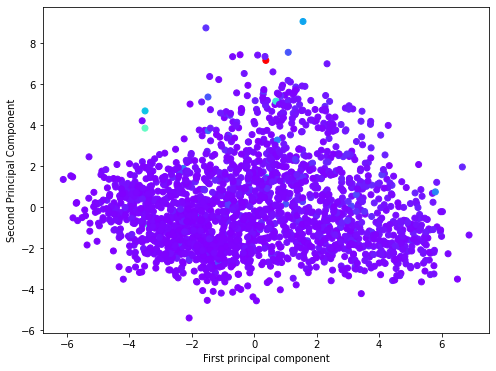

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=merged_dfs['gas_leaks_pp'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


In [74]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

43.00288854899229

In [75]:
import plotly.express as px

pca = PCA(n_components=3)
components = pca.fit_transform(scaled_data)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=merged_dfs['gas_leaks_pp'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [100]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
X, _ = load_digits(return_X_y=True)


In [103]:
load_digits

<function sklearn.datasets._base.load_digits(*, n_class=10, return_X_y=False, as_frame=False)>

In [ ]:
transformer = FastICA(n_components=7,
        random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

In [104]:
merged_dfs.columns

Index(['geoid', 'avg_bldg_age', 'gentrified', '311total_compl_pp',
       '%311: water system', '%311: noise', '%311: plumbing',
       '%311: illegal parking', '%311: unsanitary condition', '%311: sewer',
       '%311: street light condition', '%311: heating',
       '%311: street condition', '%311: blocked driveway',
       '%311: sanitation condition', '%311: paint/plaster',
       '%311: dirty conditions', '%311: request large bulky item collection',
       '%311: heat/hot water', '%housh_grandp_resp_for_grandch',
       'avg_houshold_size', 'gas_leaks_pp', 'lonely_housholder%',
       'lonely_housholder_over65%', 'mean_houshold_income',
       'nonfamily_housholds%', 'not_us_citizen%', 'unemployed%',
       'vacant_housing_units%', 'gas_leaks'],
      dtype='object')